In [67]:
from minisom import MiniSom
from numpy import zeros
import numpy as np

### importing datasets from sklearn

In [111]:
from sklearn.datasets import load_breast_cancer

In [112]:
import time

### Set hyperpara

In [114]:
som_grid_rows = 15
som_grid_columns = 15
iterations = 50
sigma = 1
learning_rate = 0.1

In [115]:
type(load_breast_cancer)

function

### load data

In [116]:
data, target = load_breast_cancer(True)

In [117]:
data.shape[1] #columns

30

In [118]:
data.shape[0] #rows

569

In [119]:
#target

### initialisation

In [120]:
#sigma is radius
som = MiniSom(x=som_grid_rows,y=som_grid_columns,input_len=data.shape[1],learning_rate=learning_rate,sigma=sigma)

In [121]:
som.random_weights_init(data)

In [122]:
print(len(som.get_weights()[0][0])) #Each neuron has 30 dimensional weight

30


### Training

In [123]:
start_time = time.time()
# training with 100 iterations
som.train_random(data,iterations) 
elapsed_time = time.time() - start_time
print('Total training time: ',elapsed_time)

Total training time:  0.17377686500549316


In [124]:
#testing new data point
test = np.random.randint(10)
for i in range(10):
    test = np.random.randint(10)
    #print(data[test])
    print(som.winner(data[test]))

(4, 5)
(0, 0)
(0, 6)
(4, 5)
(0, 0)
(8, 4)
(0, 0)
(0, 6)
(3, 0)
(0, 7)


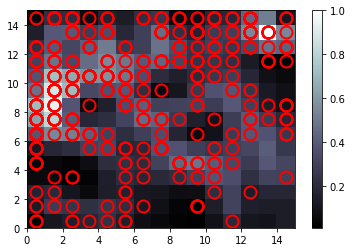

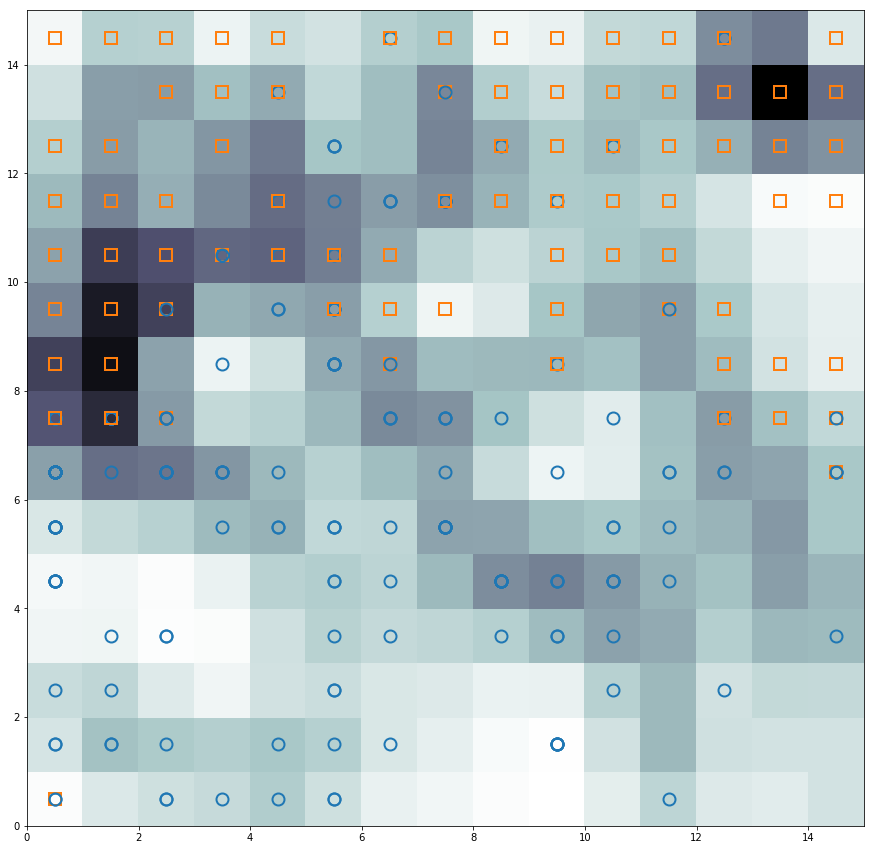

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = np.zeros(len(target), dtype=int)
t[target == 0] = 0
t[target == 1] = 1

# use different colors and markers for each label
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 15, 0, 15])
plt.savefig('cancer.png')
plt.show()


138


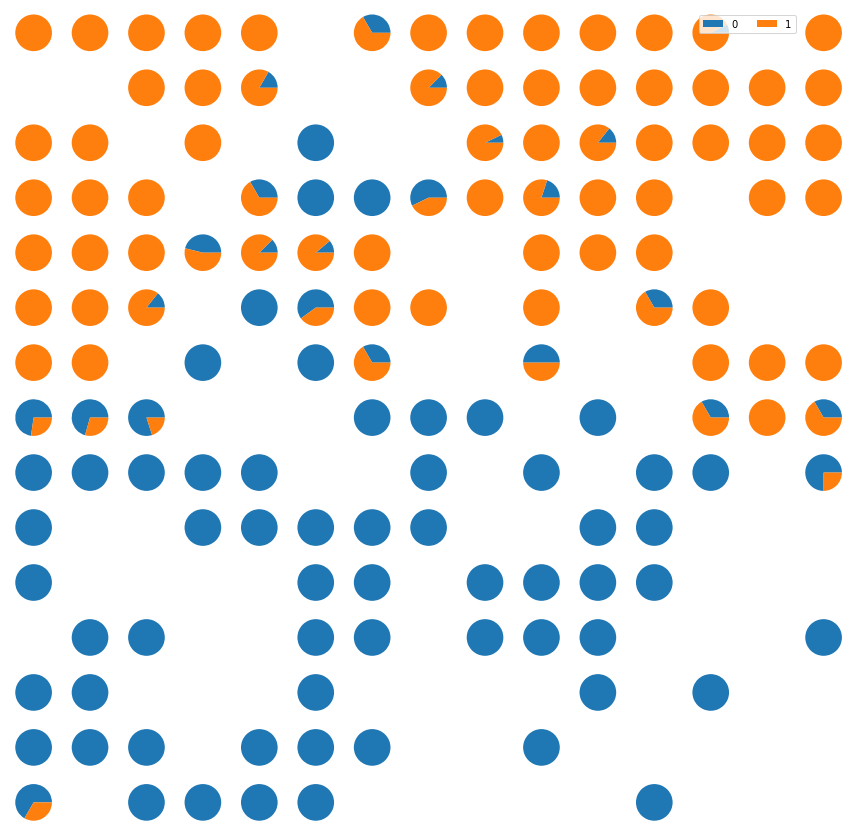

In [128]:
from matplotlib.gridspec import GridSpec
label = target
labels_map = som.labels_map(data, label)
label_names = np.unique(label)

plt.figure(figsize=(15, 15))
the_grid = GridSpec(15, 15)
print(len(labels_map.keys()))
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[14-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1), ncol=2)
plt.savefig('cancer_cluster.png')
plt.show()